In [1]:
dataset=[
    ['사과','치즈','생수'],   # 하나의 영수증
    ['생수','호두','치즈','고등어'],
    ['수박','사과','생수'],
    ['생수','호두','치즈','옥수수']
]   

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 트랜잭션 자료형으로 변환
# x축: 전체 품목, y축: 거래 아이디(한장의 영수증)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns = te.columns_)   # 데이터프레임 변환
df.head(3)

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False


In [ ]:
### 트랜잭션 : DB내에서 한꺼번에 수행되어야 할 일련의 연산들
### 트랜잭션의 모든 연산은 반드시 한꺼번에 완료가 되어야 하며 그렇지 않은 경우에는 한꺼번에 취소되어야 하는 원자성(Atomicity)을 갖고 있음

In [3]:
# 선험적 알고리즘 support > 0.5
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.5, use_colnames = True)   # min_support기준은 정해서 보는 것
frequent_itemsets   # 사과를 살 확률은 50%, 치즈 / 생수를 같이 살 확률은 75%

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(호두, 치즈)"
8,0.50,"(호두, 치즈, 생수)"


In [11]:
# confidence > 0.8 (기본값 0.3)
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.8)
rules    # 선행 antecedentes 사과를 사면 / 후행 conseqeunts 생수를 산다 
# 지지도 support A → B  P(A 합집합 B)
# lift = 1 향상도. 반드시 같이 삼?

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(사과),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
1,(치즈),(생수),0.75,1.00,0.75,1.0,1.000000,0.000,inf,0.0
2,(호두),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
3,(호두),(치즈),0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5
4,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
5,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5
6,(호두),"(치즈, 생수)",0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5


In [12]:
# confidence > (기본값 0.3)
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.3)
rules    # 선행 antecedentes 사과를 사면 / 후행 conseqeunts 생수를 산다: lift:

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
2,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
3,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
8,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
9,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5


In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

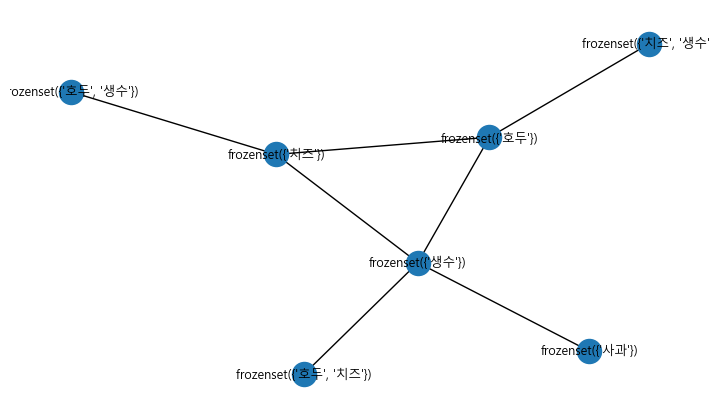

In [10]:
# 선행 antecedentes ~라면 / 결과~이다 consequents
import networkx as nx
ga = nx.from_pandas_edgelist(rules, source='antecedents', target = 'consequents')
plt.figure(figsize = (7,4))
nx.draw(ga, with_labels = True, font_family = font_name, font_size = 9)
# source: 그래프의 안쪽 노드, target: 그래프의 바깥쪽 노드
